<a href="https://colab.research.google.com/github/viannaandreBR/My-Data-Science-Journey/blob/main/C%C3%B3pia_de_Rede_Neural_TensorFlow_Personagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural com TensorFlow - Personagens

## Importação das bibliotecas

In [ ]:
!pip3 install seaborn

In [42]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

## Carregamento da base de dados

In [43]:
dataset = pd.read_csv('personagens.csv')

In [44]:
dataset.shape

(293, 7)

In [45]:
dataset.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [46]:
dataset.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429134,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


<AxesSubplot:xlabel='classe', ylabel='count'>

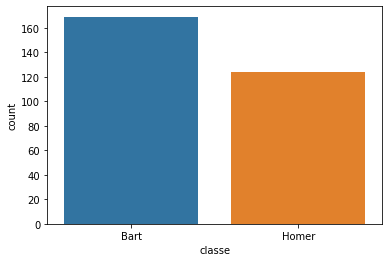

In [47]:
sns.countplot(x = 'classe', data=dataset)

<AxesSubplot:>

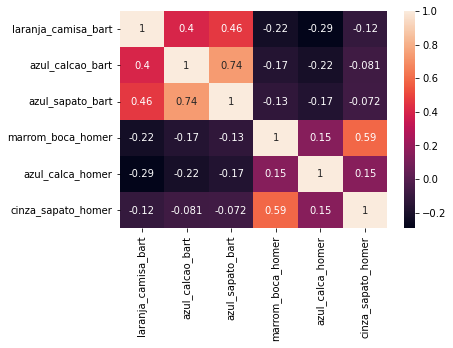

In [48]:
sns.heatmap(dataset.corr(), annot=True)

In [49]:
dataset.shape

(293, 7)

In [50]:
X = dataset.iloc[:, 0:6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [51]:
y = dataset.iloc[:, 6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [52]:
y = (y == 'Homer')
y
#y1 = (y == 'Bart')
#y1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
#y2 = (y == 'Homer')
#y2

In [53]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

In [54]:
X_treinamento.shape, y_treinamento.shape

((234, 6), (234,))

In [55]:
X_teste.shape, y_teste.shape

((59, 6), (59,))

## Construção e treinamento da rede neural

In [56]:
(6 + 1) / 2

3.5

In [ ]:
# (entradas + saídas) / 2
# 6 -> 4 -> 4 -> 4 -> 1

In [57]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [58]:
rede_neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Otimizador Adam
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Otimizador SGD
#rede_neural.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#rede_neural.tf.strings.to_number(x, out_type=tf.float32)

In [60]:
#model.fit(X_train, y_train, nb_epoch=3, batch_size=16, verbose=1)
#historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=50, validation_split=0.1)

historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 1s 58ms/step - loss: 0.9303 - accuracy: 0.4316 - val_loss: 0.8773 - val_accuracy: 0.3750
Epoch 2/50
7/7 [==============================] - 0s 18ms/step - loss: 0.8636 - accuracy: 0.4682 - val_loss: 0.8236 - val_accuracy: 0.4167
Epoch 3/50
7/7 [==============================] - 0s 14ms/step - loss: 0.8415 - accuracy: 0.4377 - val_loss: 0.7688 - val_accuracy: 0.4583
Epoch 4/50
7/7 [==============================] - 0s 17ms/step - loss: 0.7761 - accuracy: 0.4870 - val_loss: 0.7207 - val_accuracy: 0.5417
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.7254 - accuracy: 0.5721 - val_loss: 0.6808 - val_accuracy: 0.6667
Epoch 6/50
7/7 [==============================] - 0s 16ms/step - loss: 0.7126 - accuracy: 0.6489 - val_loss: 0.6501 - val_accuracy: 0.7083
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6920 - accuracy: 0.6648 - val_loss: 0.6287 - val_accuracy: 0.7083
Epoch 8/50
7/7 [===========

## Avaliação da rede neural

In [61]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

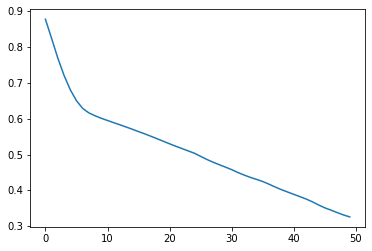

In [62]:
plt.plot(historico.history['val_loss'])

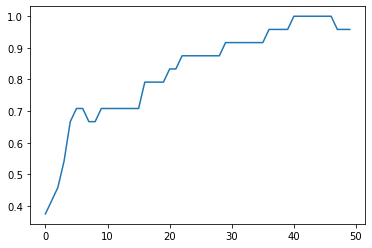

In [63]:
plt.plot(historico.history['val_accuracy'])

In [64]:
previsoes = rede_neural.predict(X_teste)
previsoes

array([[0.5602572 ],
       [0.44376096],
       [0.3419051 ],
       [0.37273473],
       [0.34894705],
       [0.44466406],
       [0.62771624],
       [0.9997852 ],
       [0.6289923 ],
       [0.5037522 ],
       [0.37273473],
       [0.34837013],
       [0.3637439 ],
       [0.37273473],
       [0.9530039 ],
       [1.        ],
       [0.37273473],
       [0.87352395],
       [0.35028583],
       [0.3504573 ],
       [0.37273473],
       [0.4516712 ],
       [0.98885417],
       [0.8412203 ],
       [0.4488308 ],
       [0.4840908 ],
       [0.36056328],
       [0.44318262],
       [0.44367933],
       [0.9999585 ],
       [0.34622514],
       [0.37273473],
       [0.3549002 ],
       [0.3535183 ],
       [0.44574308],
       [0.37273473],
       [0.37273473],
       [0.3497264 ],
       [0.37273473],
       [0.35235023],
       [0.37273473],
       [0.9960116 ],
       [0.44398838],
       [0.44812644],
       [0.9999954 ],
       [0.37273473],
       [0.35277906],
       [0.960

In [ ]:
# 1 True - Bart
# 0 False - Homer

In [65]:
previsoes = (previsoes > 0.5)
previsoes

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [66]:
y_teste

array([ True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True, False])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.9322033898305084

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[38,  0],
       [ 4, 17]])

<AxesSubplot:>

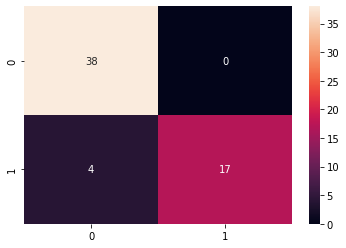

In [69]:
sns.heatmap(cm, annot=True)